In [7]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as plticker
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib notebook

In [8]:
def check_csv(fname):
    file_lines = ""
    with open(fname, 'r') as f:
        file_lines = [x for x in f.readlines()]
        max_commas = max([x.count(",") for x in file_lines])
#         for line in f:
#             count = line.count(',')
#             max_commas = max_commas if (max_commas > count) else count
#         print(max_commas)
    
    with open(fname, 'w') as f:
        for line in file_lines:
            f.write(line[:-1] + "," * (max_commas - line.count(',')) + "\n")
            
# check_csv(r"2d-with-longitudinal-cell/hexagonal-long-mounting_correct_sym_points.freq_2.dat")


In [11]:
# Only considering longitudinal peridiocity, no band gap required, only looking for modes
def plot_bands(fname,  numSymPoints, numInterpolate, labelSymPoints, numbands=8, lightline=False):
    '''
    numbands: number of bands plotted. The maximum input value is determined by the number of bands simulated in MPB
    numberSymPoints: number of symmetry points overr which the wave vectors k are interpolated
    numInterpolate: number of points between the symmetry points
    lightline: show the speed of light dispersion in addition (TODO for high dim. lattices)
    
    example: for a 1D lattice there are only two symmetry points, k=(0,0,0) and k=(0.5, 0, 0) in units of the reciprocal 
        basis. If they were interpolated with 10 points the total number of used k points is 10*(2-1) + 2= 12. (2-1) here 
        stands for the number of intervals
    Generally, the number of k points is numInterpolate*(numSymPoints -1 ) + numSymPoints 
    '''
#     "../MPB/2d-hexagonal/glass-hexagonal-cyl-bands.tm.dat"
#  k index, k1, k2, k3, kmag/2pi, band 1, band 2, band 3, band 4, band 5, band 6, band 7, band 8

    data= np.genfromtxt(fname, skip_header=1, delimiter=",", dtype="str")
    data=data[:,1:-2].astype(float)
    
    fig = plt.figure( figsize= 1.2*plt.figaspect(0.75))
    ax1= fig.add_subplot(1,1,1)
    k_index = data.T[0,:]
    print(data.T[5:5+numbands].shape)
    for freq_band in data.T[5:5+numbands] :
        ax1.plot(freq_band, marker="o", linestyle="-" )
            
    ax1.set_ylabel(r"$\omega a / 2\pi c$")
    ax1.set_xlabel(r"k")

    ax1.set_xticklabels([])
#     ax1.set_xlim(left=0)
#     ax1.set_ylim(bottom=0)

#   Gamma M K L Gamma A M H K Gamma H
#     k_points = ["", r"$\Gamma$" , r"M", r"K", r"L", r"$\Gamma$", r"A", "M", "H", "K", r"$\Gamma$", "H"]
    k_points = labelSymPoints

#     # http://stackoverflow.com/questions/30482727/pyplot-setting-grid-line-spacing-for-plot
#     #Spacing between each line
#     #intervals = float(5)
    intervals = float(numInterpolate+1)
    loc = plticker.MultipleLocator(base=intervals)
#     # matplotlib.ticker.IndexLocator(base, offset)  would be better for index plotting
    ax1.xaxis.set_major_locator(loc)
    ax1.xaxis.set_minor_locator(plticker.MultipleLocator(1))
    ax1.grid(which='major', axis='both', linestyle='-')
    ax1.set_xticklabels(k_points)
    
    
    # Custom Labels
#     handles, labels = ax1.get_legend_handles_labels()
#     ax1.legend([ handles[0], handles[numbands] ], [ labels[0], labels[numbands] ])
    

plot_bands("2D-mounted-with-1D-Bands/1-cell-fin-mount-1-rod-wvg/bands-mounted_2D_wvg.freq.dat", 
           numSymPoints=2,  
           numInterpolate=39, 
           labelSymPoints= ["",  r"$\Gamma$", r"X"],
           numbands=18, 
           lightline=True)



<IPython.core.display.Javascript object>

(13, 41)


(101, 16)


<IPython.core.display.Javascript object>


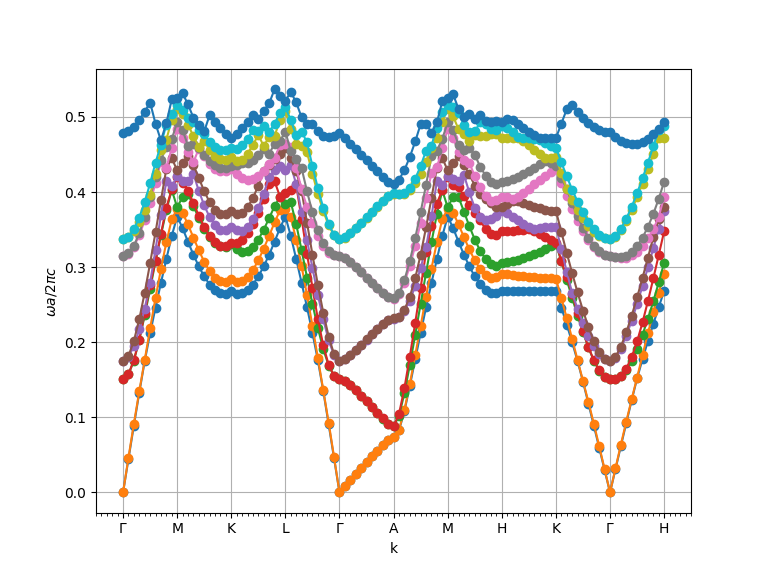

(11, 101)


In [8]:
def plot_band_hex_cyl(fname, numbands=8):
    '''
    numbands: number of bands plotted. The maximum input value is determined by the number of bands simulated in MPB
    '''
#     "../MPB/2d-hexagonal/glass-hexagonal-cyl-bands.tm.dat"
#  k index, k1, k2, k3, kmag/2pi, band 1, band 2, band 3, band 4, band 5, band 6, band 7, band 8

    data= np.genfromtxt(fname, skip_header=1, delimiter=",", dtype="str")
    data=data[:,1:-2].astype(float)
    print(data.shape)
    
    fig = plt.figure( figsize= 1.2*plt.figaspect(0.75))
    ax1= fig.add_subplot(1,1,1)
    k_index = data.T[0,:]
    print(data.T[5:5+numbands].shape)
    for freq_band in data.T[5:5+numbands] :
        ax1.plot(freq_band, marker="o", linestyle="-" )
            
    ax1.set_ylabel(r"$\omega a / 2\pi c$")
    ax1.set_xlabel(r"k")

    ax1.set_xticklabels([])
#     ax1.set_xlim(left=0)
#     ax1.set_ylim(bottom=0)

#   Gamma M K L Gamma A M H K Gamma H
    k_points = ["", r"$\Gamma$" , r"M", r"K", r"L", r"$\Gamma$", r"A", "M", "H", "K", r"$\Gamma$", "H"]

#     # http://stackoverflow.com/questions/30482727/pyplot-setting-grid-line-spacing-for-plot
#     #Spacing between each line
#     #intervals = float(5)
    intervals = float(10)
    loc = plticker.MultipleLocator(base=intervals)
#     # matplotlib.ticker.IndexLocator(base, offset)  would be better for index plotting
    ax1.xaxis.set_major_locator(loc)
    ax1.xaxis.set_minor_locator(plticker.MultipleLocator(1))
    ax1.grid(which='major', axis='both', linestyle='-')
    ax1.set_xticklabels(k_points)
    
    
    # Custom Labels
#     handles, labels = ax1.get_legend_handles_labels()
#     ax1.legend([ handles[0], handles[numbands] ], [ labels[0], labels[numbands] ])
    

plot_band_hex_cyl("2d-with-longitudinal-cell-full-bands/hexagonal-long-mounting_correct_sym_points.check_parities.freq.dat", numbands=12)


(101, 12)


<IPython.core.display.Javascript object>


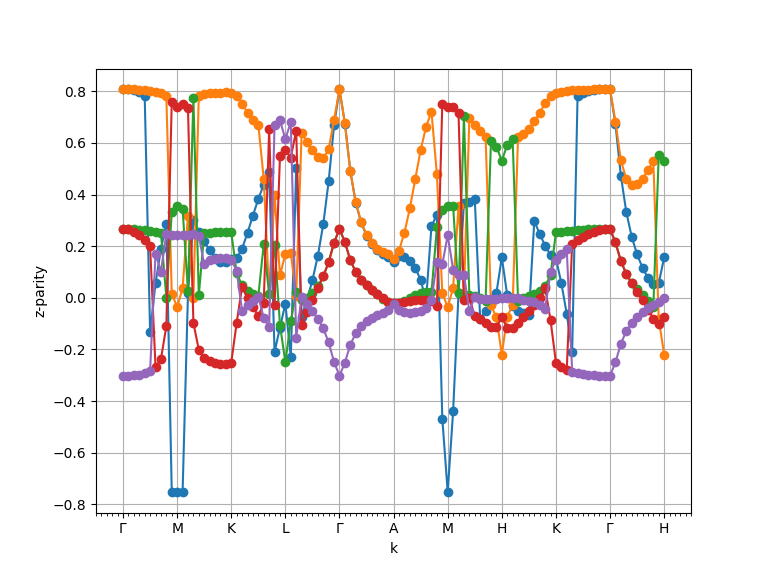

(5, 101)


In [7]:
def plot_zparity(fname, numbands=5):
    data= np.genfromtxt(fname, skip_header=0, delimiter=",", dtype="str")
    data=data[:,1:-2].astype(float)
    print(data.shape)
    
    fig = plt.figure( figsize= 1.2*plt.figaspect(0.75))
    ax1= fig.add_subplot(1,1,1)
    k_index = data.T[0,:]
    print(data.T[5:5+numbands].shape)
    for freq_band in data.T[5:5+numbands] :
        ax1.plot(freq_band, marker="o", linestyle="-" )
            
    ax1.set_ylabel(r"z-parity")
    ax1.set_xlabel(r"k")

    ax1.set_xticklabels([])
#     ax1.set_xlim(left=0)
#     ax1.set_ylim(bottom=0)

#   Gamma M K L Gamma A M H K Gamma H
    k_points = ["", r"$\Gamma$" , r"M", r"K", r"L", r"$\Gamma$", r"A", "M", "H", "K", r"$\Gamma$", "H"]

#     # http://stackoverflow.com/questions/30482727/pyplot-setting-grid-line-spacing-for-plot
#     #Spacing between each line
#     #intervals = float(5)
    intervals = float(10)
    loc = plticker.MultipleLocator(base=intervals)
#     # matplotlib.ticker.IndexLocator(base, offset)  would be better for index plotting
    ax1.xaxis.set_major_locator(loc)
    ax1.xaxis.set_minor_locator(plticker.MultipleLocator(1))
    ax1.grid(which='major', axis='both', linestyle='-')
    ax1.set_xticklabels(k_points)
    
    
plot_zparity("2d-with-longitudinal-cell-full-bands/hexagonal-long-mounting_correct_sym_points.check_parities.zparity.dat")

In [ ]:
def read_bands_freq(fpath):
    bands_import= np.genfromtxt(fpath, skip_header=1, delimiter=",", dtype="str")
    return bands_import[:, 1:].astype(float)

In [ ]:
def plot_bands_with_kz(numbands=7, num_kz=10, num_kt_interpolate=9):
    '''
    numbands: number of bands plotted. The maximum input value is determined by the number of bands simulated in MPB
    num_kz: number of kz over which the simulation was stepped
    num_kt_interpolate: number of interpolated points between characteristic points of the Brilloin zone used in the simulation
    '''
    # within one of the arrays:
    # k index, k1, k2, k3, kmag/2pi, band 1, band 2, band 3, band 4, band 5, band 6, band 7, band 8
    data= np.array( [ read_bands_freq("../MPB/2d-hexagonal/varied_k_z/glass-hexagonal-cyl-bands-k_z-{0:.3f}.freq.dat".format(i/10))
         for i in range(10) ] )
    fig = plt.figure( figsize= 1.2*plt.figaspect(1.1))
    ax1= fig.add_subplot(1,1,1)
    for band in data[0].T[5:]:
        ax1.plot(data[0, :, 0], band, marker="o", linestyle="-")
    
    ax1.set_ylabel(r"$\omega a / 2\pi c$")
    ax1.set_xlabel(r"$k a/ 2\pi $")
    ax1.set_xticklabels([])
#     # Gamma X M R  X Gamma Z R T Z Gamma
    k_points = ["", r"$\Gamma$" , r"M", r"K", r"$\Gamma$"]
#     # http://stackoverflow.com/questions/30482727/pyplot-setting-grid-line-spacing-for-plot
#     #Spacing between each line
#     #intervals = float(5)
    intervals = float(num_kt_interpolate+1)
    loc = plticker.MultipleLocator(base=intervals)
#     # matplotlib.ticker.IndexLocator(base, offset)  would be better for index plotting
    ax1.xaxis.set_major_locator(loc)
    ax1.xaxis.set_minor_locator(plticker.MultipleLocator(1))
    ax1.grid(which='major', axis='both', linestyle='-')
    ax1.set_xticklabels(k_points)
    ax1.set_title(r"$k_z = {0:.2f} $".format(data[0,0,3]) )
    
    fix_ylim = True
    def update_by_kz(index_kz=0):
        for line, band in zip(ax1.lines, data[index_kz].T[5:]):
            line.set_ydata(band)
            ax1.set_title(r"$k_z a / 2 \pi = {0:.2f} $".format(data[index_kz,0,3]) )
        update_lower_y_lim(fix_ylim)
#         fig.canvas.draw()
    
    def update_lower_y_lim(bool_ylim=True):
        global fix_ylim
        fix_ylim = bool_ylim
        ax1.relim()
        ax1.autoscale_view()
        if bool_ylim:
            ax1.set_ylim(0, None, auto=True)
        
    
    interact(update_by_kz, index_kz=widgets.IntSlider(min=0,max=num_kz-1,step=1,value=0))
    interact(update_lower_y_lim, bool_ylim=widgets.Checkbox(
        value=True,
        description='Fix lower y limit at 0'
    ))
    
plot_bands_with_kz()
